## Ensemble Lab

Using the same approach in class, splitting into a testing and traing set and evaluating using RMSE, please answer the following questions:

1. After how many bagged samples does the Decision Tree stop improving on the car data?
2. Fit a linear model using sklearn's LinearRegression and measure the performance. Then perform bagging and see how the performance changes
3. Compare the performance of the decision tree and linear regression by itself, and compare the 
performance by combining these two

Note: When you break up the data into training and testing use test_size = .9

train_test_split(data, test_size=.9)

In [140]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('vehicles.csv')
#columns = ['highway08', 'displ', 'sCharger', 'tCharger','year', 'cylinders']
#data = data[columns]
data.keys()

Index([u'barrels08', u'barrelsA08', u'charge120', u'charge240', u'city08',
       u'city08U', u'cityA08', u'cityA08U', u'cityCD', u'cityE', u'cityUF',
       u'co2', u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08',
       u'comb08U', u'combA08', u'combA08U', u'combE', u'combinedCD',
       u'combinedUF', u'cylinders', u'displ', u'drive', u'engId', u'eng_dscr',
       u'feScore', u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1',
       u'ghgScore', u'ghgScoreA', u'highway08', u'highway08U', u'highwayA08',
       u'highwayA08U', u'highwayCD', u'highwayE', u'highwayUF', u'hlv', u'hpv',
       u'id', u'lv2', u'lv4', u'make', u'model', u'mpgData', u'phevBlended',
       u'pv2', u'pv4', u'range', u'rangeCity', u'rangeCityA', u'rangeHwy',
       u'rangeHwyA', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'VClass', u'year', u'youSaveSpend', u'guzzler', u'trans_dscr',
       u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor', u

In [121]:
data = data[~pd.isnull(data.displ)]
data['sCharger'] = data.sCharger.map({None: 0, 'S':1})
data['tCharger'] = data.tCharger.map({None: 0, 'T':1})
data = data.dropna()

In [122]:
train, test = train_test_split(data, test_size=.9)

In [123]:
# define the training and testing sets
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [124]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=68, bootstrap=True, oob_score=True, random_state=1)

In [125]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 19.71056256,  18.05196078,  24.78813025, ...,  10.02941176,
        20.5186683 ,  19.81281831])

In [126]:
# calculate RMSE
bagged_samples = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [127]:
print "It stops improving data at %d bagged samples" % bagged_samples

It stops improving data at 3 bagged samples


In [128]:
# list of values to try for max_depth
max_depth_range = range(1, 68)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=68, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

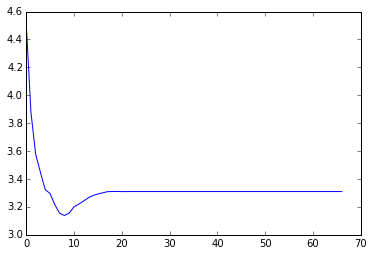

In [137]:
plt.plot(RMSE_scores)

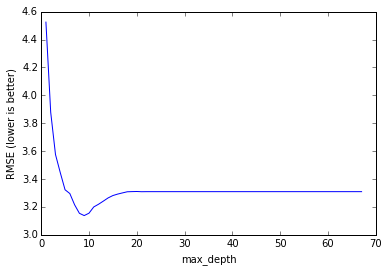

In [136]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [135]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(3.1385187406921427, 9)

In [144]:
linreg = LinearRegression()
linreg.fit(max_depth_range, RMSE_scores)

ValueError: Found arrays with inconsistent numbers of samples: [ 1 67]

#### How does performance of the DT change as you change the number of bagged samples?

#### How does bagging help improve the performance of a linear model on the fuel data?

#### How does performance change if you average results of your LM and Decision Tree?

#### Why do you think Linear Regression wasn't affected by bootstrapping?